***Project Owner : Sujay Torvi , Email me at sujay.torvi@gmail.com
Copyright © 2019***

# AI Capstone Project
## Domain: Retail
## Problem Statement

***Demand Forecast is one of the key tasks in Supply Chain and Retail Domain in general. It is key in effective operation and optimization of retail supply chain. Effectively solving this problem requires knowledge about a wide range of tricks in Data Sciences and good understanding of ensemble techniques.***
***You are required to predict sales for each Store-Day level for one month. All the features will be provided and actual sales that happened during that month will also be provided for model evaluation.***

## Agenda for Week 4
### Implementing Artificial Neural Networks
### 1. Use ANN (Artificial Neural Network) to predict Store Sales.
#### a)    Fine-tune number of layers,
#### b)    Number of Neurons in each layers .
#### c)    Experiment in batch-size.
#### d)    Experiment with number of epochs. Carefully observe the loss and accuracy? What are the observations?
#### e)    Play with different  Learning Rate  variants of Gradient Descent like Adam, SGD, RMS-prop.
#### f)    Which activation performs best for this use case and why?
#### g)    Check how it performed in the dataset, calculate RMSE.
### 2. Use Dropout for ANN and find the optimum number of clusters (clusters formed considering the features: sales and customer visits). Compare model performance with traditional ML based prediction models. 
### 3. Find the best setting of neural net that minimizes the loss and can predict the sales best. Use techniques like Grid search, cross-validation and Random search.

In [0]:
#Import libraries

In [0]:
import numpy as np
import pandas as pd

### Data Preprocessing

In [5]:
train = pd.read_csv('train_data.csv')
train.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,2,2015-06-30,5735,568,1,1,0,0
1,2,2,2015-06-30,9863,877,1,1,0,0
2,3,2,2015-06-30,13261,1072,1,1,0,1
3,4,2,2015-06-30,13106,1488,1,1,0,0
4,5,2,2015-06-30,6635,645,1,1,0,0


In [6]:
test = pd.read_csv('test_data_hidden.csv')
test.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [0]:
train = train[train.Open == 1]
train = train[['Store','DayOfWeek','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday']]

In [0]:
test = test[test.Open == 1]
test = test[['Store','DayOfWeek','Sales','Customers','Open','Promo','StateHoliday','SchoolHoliday']]

In [0]:
#map a - 1, b- 2 & c - 3 in the state holiday
def cleanHoliday(x):
  if(x == 0):
    x = '0'
  elif(x == 'a'):
    x = 1
  elif(x == 'b'):
    x = 2
  elif(x == 'c'):
    x = 3
  return x
train.StateHoliday = train.StateHoliday.map(cleanHoliday)
test.StateHoliday = test.StateHoliday.map(cleanHoliday)

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
X_train = np.asarray(train[['DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday']])
X_test = np.asarray(test[['DayOfWeek','Customers','Open','Promo','StateHoliday','SchoolHoliday']])
y_train = np.asarray(train.Sales)
y_test = np.asarray(test.Sales)

In [0]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
y_train = sc.fit_transform(y_train)
y_test = sc.fit_transform(y_test)

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(.95) #will retain 95% variance in the data

In [16]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pca.n_components_ #shows how many features pca chose

5

In [0]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [0]:
y_test = sc.inverse_transform(y_test)

In [0]:
import tensorflow as tf

In [0]:
from tensorflow import keras

### Using Keras API to train neural network on dataset

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.core import Activation,Dropout,Dense
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### Train 5 Different Model with Different Parameters

In [0]:
def build_model_1():
  model = Sequential()
  model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
  model.add(Dense(3, kernel_initializer='normal'))
  model.add(Dense(3, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [0]:
model = build_model_1()

In [0]:
model.fit(X_train, y_train, epochs = 100, batch_size = 25000)

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = sc.inverse_transform(y_pred)

In [175]:
rmse = sqrt(mean_squared_error(y_pred,y_test))
rmse

1513.7465158283935

In [0]:
def build_model_2():
  model = Sequential()
  model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
  model.add(Dense(3, kernel_initializer='normal'))
  model.add(Dense(3, kernel_initializer='normal'))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adagrad')
  return model

In [0]:
model = build_model_2()

In [0]:
model.fit(X_train, y_train, epochs = 100, batch_size = 2500)

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = sc.inverse_transform(y_pred)

In [221]:
rmse = sqrt(mean_squared_error(y_pred,y_test))
rmse

1517.4411870630245

In [0]:
def build_model_3():
  model = Sequential()
  model.add(Dense(5, input_dim=5, kernel_initializer='random_normal', activation='relu'))
  model.add(Dense(3, kernel_initializer='random_normal'))
  model.add(Dense(1, kernel_initializer='random_normal'))
  model.compile(loss='mean_squared_error', optimizer='sgd')
  return model

In [0]:
model = build_model_3()

In [0]:
model.fit(X_train, y_train, epochs = 150, batch_size = 2500)

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = sc.inverse_transform(y_pred)

In [74]:
rmse = sqrt(mean_squared_error(y_pred,y_test))
rmse

1525.6699726566487

In [0]:
def build_model_4():
  model = Sequential()
  model.add(Dense(5, input_dim=5, kernel_initializer='random_uniform', activation='relu'))
  model.add(Dense(3, kernel_initializer='random_uniform'))
  model.add(Dense(1, kernel_initializer='random_uniform'))
  model.compile(loss='mean_squared_error', optimizer='rmsprop')
  return model

In [76]:
model = build_model_4()

In [0]:
model.fit(X_train, y_train, epochs = 200, batch_size = 5000)

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = sc.inverse_transform(y_pred)

In [80]:
rmse = sqrt(mean_squared_error(y_pred,y_test))
rmse

1532.4700943526816

In [0]:
def build_model_5():
  model = Sequential()
  model.add(Dense(5, input_dim=5, kernel_initializer='random_uniform', activation='relu'))
  model.add(Dense(4, kernel_initializer='random_uniform'))
  model.add(Dense(1, kernel_initializer='random_uniform'))
  model.compile(loss='mean_squared_error', optimizer='adadelta')
  return model

In [0]:
model = build_model_5()

In [0]:
model.fit(X_train, y_train, epochs = 100, batch_size = 10000)

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = sc.inverse_transform(y_pred)

In [250]:
rmse = sqrt(mean_squared_error(y_pred,y_test))
rmse

1514.9820586407577

### **Lets Draw A Comparision**

### **Neural Networks**:

|Model No.| Learning Variant | Activation Function | Batch Size | Epoch | Layers | RMSE
| --- | --- | --- | --- | --- | --- | --- |
| Model 1| Adam | Relu | 25000 | 100 | 4 | 1513.74
| Model 2 | Adagrad | Relu | 2500 | 100| 4 | 1517.44
| Model 3 | SGD | Relu | 2500 | 150| 3 | 1525.66
| Model 4 | RMSProp | Relu | 5000 | 200| 4 | 1532.47
| Model 4 | Adadelta | Relu | 10000 | 100| 4 | 1514.98

### **Model 1 has the lowest RMSE Score**
### ***Best Activation Function***
### The best activation function for this usecase is Relu. You can also use linear activation function for a regression problem but it is not appropriate for this usecase as you dont want to handle negative customer visits. Sigmoid is not appropriate for this usecase as it is converting the values to a probability value, same goes for softmax activation(only difference is sigmoid is suited for binary classification & softmax is used for multiclass classification). 

### ***Batch Size*** 
### It depends, it should not be too high and not too low. If neural network is not too complex a lesser batch size can (and is recommended) be used, otherwise stick to larger batch sizes. Also SGD does not learn at all or learns very slowly at high batch sizes : in this usecase when SGD was used with 100,000  Batch size at about 20 epochs it stopped learning and the loss was constant. Seemed like a bad activation, but it is not , actually it works good at low batch sizes.

### ***No. of Layers & No. of neuron in each layer***
### For structured data neural networks do not need to be very complex and hidden layers can be of 1 or 2 layers(total 3 or 4 including input & output layers). No. of hidden neurons can be the mean of neurons in input and output layer.

### ***Epochs***
### The number of epochs should not be too high nor too low. In this usecase 100 epochs are sufficient. As it can be seen when 150, or 200 epochs were used it started to overfit. However for SGD epochs needed were slightly high as it was learning slowly as compared to adam or adagrad.



In [0]:
# use sales and customer visits & include dropout neurons

In [154]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data_hidden.csv')
train = train[train.Open == 1]
test = test[test.Open == 1]
train = train[['Sales','Customers']]
test = test[['Sales','Customers']]

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
X_train = np.asarray(train.Customers)
X_test = np.asarray(test.Customers)
y_train = np.asarray(train.Sales)
y_test = np.asarray(test.Sales)

In [0]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [0]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
y_train = sc.fit_transform(y_train)

In [0]:
from keras.layers import Dropout

In [0]:
def build_model():
  model = Sequential()
  model.add(Dense(1, input_dim=1, kernel_initializer='normal', activation='relu'))
  model.add(Dense(4, kernel_initializer='normal'))
  model.add(Dropout(0.25))
  model.add(Dense(4, kernel_initializer='normal'))
  model.add(Dropout(0.25))
  model.add(Dense(1, kernel_initializer='normal'))
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [0]:
model = build_model()

In [182]:
model.fit(X_train, y_train, epochs = 150, batch_size = 100000)

Epoch 1/150
814204/814204 [==============================] - 1s 2us/step - loss: 1.0000
Epoch 2/150
814204/814204 [==============================] - 0s 0us/step - loss: 1.0000
Epoch 3/150
814204/814204 [==============================] - 0s 0us/step - loss: 1.0000
Epoch 4/150
814204/814204 [==============================] - 0s 0us/step - loss: 1.0000
Epoch 5/150
814204/814204 [==============================] - 0s 0us/step - loss: 0.9999
Epoch 6/150
814204/814204 [==============================] - 0s 0us/step - loss: 0.9997
Epoch 7/150
814204/814204 [==============================] - 0s 0us/step - loss: 0.9994
Epoch 8/150
814204/814204 [==============================] - 0s 0us/step - loss: 0.9988
Epoch 9/150
814204/814204 [==============================] - 0s 0us/step - loss: 0.9977
Epoch 10/150
814204/814204 [==============================] - 0s 0us/step - loss: 0.9959
Epoch 11/150
814204/814204 [==============================] - 0s 0us/step - loss: 0.9931
Epoch 12/150
814204/814204 [==

In [0]:
y_pred = model.predict(X_test)

In [0]:
y_pred = sc.inverse_transform(y_pred)

In [189]:
rmse = sqrt(mean_squared_error(y_pred,y_test))
rmse

1722.1393804697086

In [0]:
y_pred = pd.DataFrame(y_pred)
X_test = pd.DataFrame(X_test)

In [0]:
from sklearn.cluster import KMeans

Epoch [1]
Epoch [2]
Epoch [3]
Epoch [4]
Epoch [5]
Epoch [6]
Epoch [7]
Epoch [8]
Epoch [9]
Epoch [10]


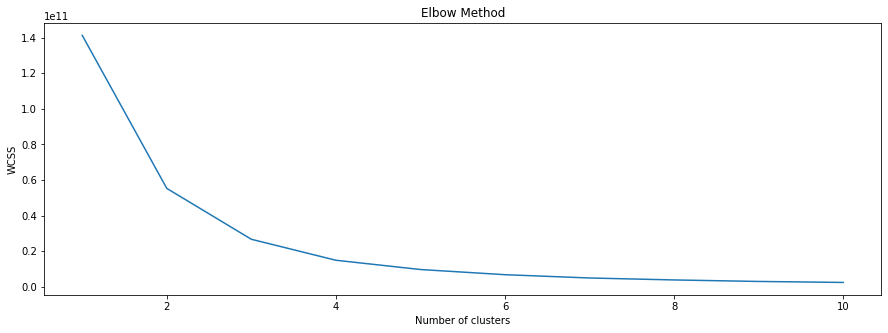

In [192]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(y_pred)
    print('Epoch [{}]'.format(i))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Epoch [1]
Epoch [2]
Epoch [3]
Epoch [4]
Epoch [5]
Epoch [6]
Epoch [7]
Epoch [8]
Epoch [9]
Epoch [10]


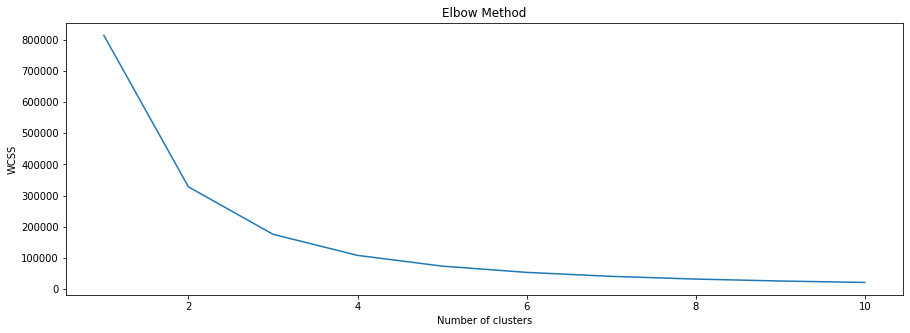

In [175]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(y_train)
    print('Epoch [{}]'.format(i))
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Optimal number of clusters is 3

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
linear = LinearRegression()

In [197]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_new_pred = linear.predict(X_test)
y_new_pred1 = linear.predict(X_train)

In [202]:
rmse = sqrt(mean_squared_error(y_new_pred1,y_train))
rmse

0.5655610752118618

In [199]:
rmse = sqrt(mean_squared_error(y_new_pred,y_test))
rmse

7621.747033216892

### As we can see the Linear Regression Model has highly overfitted [we can observe from the RMSE], hence neural network with dropout performs highly better than the linear regression model

### Best setting of neural net - use Hyperparameter Tuning(GridsearchCV , Randomized Search)

In [0]:
def create_model(activation,optimizer,neurons):
    # default values
    activation='relu' 
    dropout_rate=0.4
    init_mode='uniform' 
    optimizer='adam' 
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(dropout_rate)) 
    model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons, kernel_initializer=init_mode, activation=activation))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, kernel_initializer='normal'))
    # Compile model
    model.compile(loss='mean_squared_error', 
                  optimizer=optimizer)
    return model

In [0]:
model = KerasRegressor(build_fn=create_model, batch_size=1000, epochs=10,verbose = 1) 

In [0]:
#Parameter Space
neurons = [3, 5]
activation =  ['relu']
optimizer = ['RMSprop', 'Adagrad', 'Adam']
# grid search epochs, batch size
epochs = [100] 
batch_size = [1000,2500,5000,50000]

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [0]:
param_grid = dict(epochs=epochs, batch_size=batch_size,activation = activation, optimizer = optimizer,neurons = neurons)
grid = GridSearchCV(estimator=model, cv = 3, param_grid=param_grid, n_jobs= -1)

In [146]:
with tf.device('/GPU:0'):
  grid_search = grid.fit(X_train,y_train)

Epoch 1/100
814204/814204 [==============================] - 2s 3us/step - loss: 0.7969
Epoch 2/100
814204/814204 [==============================] - 2s 2us/step - loss: 0.4898
Epoch 3/100
814204/814204 [==============================] - 2s 2us/step - loss: 0.4170
Epoch 4/100
814204/814204 [==============================] - 2s 2us/step - loss: 0.3716
Epoch 5/100
814204/814204 [==============================] - 2s 2us/step - loss: 0.3395
Epoch 6/100
814204/814204 [==============================] - 2s 2us/step - loss: 0.3176
Epoch 7/100
814204/814204 [==============================] - 2s 2us/step - loss: 0.3017
Epoch 8/100
814204/814204 [==============================] - 2s 2us/step - loss: 0.2896
Epoch 9/100
814204/814204 [==============================] - 2s 2us/step - loss: 0.2800
Epoch 10/100
814204/814204 [==============================] - 2s 2us/step - loss: 0.2725
Epoch 11/100
814204/814204 [==============================] - 2s 2us/step - loss: 0.2664
Epoch 12/100
814204/814204 [==

In [151]:
y_pred = grid_search.predict(X_test)

30188/30188 [==============================] - 0s 1us/step


In [0]:
y_pred = sc.inverse_transform(y_pred)

In [153]:
rmse = sqrt(mean_squared_error(y_pred,y_test))
rmse

1515.1032325403005

In [123]:
grid_search.best_params_

{'activation': 'relu',
 'batch_size': 2500,
 'epochs': 100,
 'neurons': 3,
 'optimizer': 'Adagrad'}

In [0]:
model = KerasRegressor(build_fn=create_model, batch_size=1000, epochs=10,verbose = 1) 

In [0]:
param_grid = dict(epochs=epochs, batch_size=batch_size, activation = activation, optimizer = optimizer, neurons = neurons)
random_cv = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 4, cv = 2, verbose=1, random_state=11, n_jobs = 8)

In [107]:
with tf.device('/GPU:0'):
  random_cv.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 1 is smaller than n_iter=4. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:   35.3s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   2 out of   2 | elapsed:   35.3s finished


Epoch 1/100
814204/814204 [==============================] - 1s 1us/step - loss: 1.0000 - acc: 0.0000e+00
Epoch 2/100
814204/814204 [==============================] - 0s 0us/step - loss: 1.0000 - acc: 0.0000e+00
Epoch 3/100
814204/814204 [==============================] - 0s 0us/step - loss: 1.0000 - acc: 0.0000e+00
Epoch 4/100
814204/814204 [==============================] - 0s 0us/step - loss: 1.0000 - acc: 0.0000e+00
Epoch 5/100
814204/814204 [==============================] - 0s 0us/step - loss: 1.0000 - acc: 0.0000e+00
Epoch 6/100
814204/814204 [==============================] - 0s 0us/step - loss: 0.9999 - acc: 0.0000e+00
Epoch 7/100
814204/814204 [==============================] - 0s 0us/step - loss: 0.9999 - acc: 0.0000e+00
Epoch 8/100
814204/814204 [==============================] - 0s 0us/step - loss: 0.9999 - acc: 0.0000e+00
Epoch 9/100
814204/814204 [==============================] - 0s 0us/step - loss: 0.9998 - acc: 0.0000e+00
Epoch 10/100
814204/814204 [==================

In [56]:
random_cv.best_params_

{'activation': 'relu',
 'batch_size': 5000,
 'epochs': 100,
 'neurons': 5,
 'optimizer': 'Adagrad'}

In [57]:
y_pred = random_cv.predict(X_test)

30188/30188 [==============================] - 0s 3us/step


In [0]:
y_pred = sc.inverse_transform(y_pred)

In [59]:
rmse = sqrt(mean_squared_error(y_pred,y_test))
rmse

1622.2525457850575

### Here Grid Search and Randomized Search have been used. Parameter Space has been kept simple so that it does not take too long to train. When parameter space is large it takes hours to search for best parameters even on an average GPU. 

### Although Grid Search takes longer than Random Search , it performs better than the Random Search. Better Results can be achieved if parameter space is increased further. 

### Cross validation is built into Grid Search and Random Search and it can be set in the respective search's hyperparameters

### **Grid Search : RMSE - 1515.1032**
### **Best Parameters:**
#### {'activation': 'relu',
#### 'batch_size': 2500,
#### 'epochs': 100,
#### 'neurons': 3,
#### 'optimizer': 'Adagrad'}

### **Randomized Search : RMSE - 1622.25
### **Best Parameters:**
#### {'activation': 'relu',
#### 'batch_size': 5000,
#### 'epochs': 100,
#### 'neurons': 5,
#### 'optimizer': 'Adagrad'}

### As Random Search had a less parameter space and had less chances to randomly choose from the parameters than grid search , hence it performed poorly. 

### Bayesian Search is a good alternative technique to above hyperparameter tuning techniques , it conserves computational cost & time as well as gives good search results.